In [49]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

# Задание 1

In [50]:
def norm_vector(a):
    return max(list(map(abs, a)))

def norm_matrix(A):
    max_ = -100
    for i in range(4):
        max_i = 0
        for j in range(4):
            max_i += abs(A[i][j])
        if max_i > max_:
            max_ = max_i
    return max_


In [51]:
beta = 1 + 0.01 * (51 - 49)
A = np.array([
    [10 * beta, -1,         2,         3],
    [1,          10 * beta, 3,         2],
    [2,          3,         10 * beta, 1],
    [3,          2,         1,         10 * beta]
], float)
print(A)

[[10.2 -1.   2.   3. ]
 [ 1.  10.2  3.   2. ]
 [ 2.   3.  10.2  1. ]
 [ 3.   2.   1.  10.2]]


In [52]:
x0 = np.array([1, 1, 1, 1], float)
print(x0)

[1. 1. 1. 1.]


In [53]:
b = np.dot(A,x0)
b

array([14.2, 16.2, 16.2, 16.2])

In [54]:
x = [np.array([0, 0, 0, 0])]

In [75]:
E = np.array([
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]
])
m = 1/A[0][0]
D =  np.array([
    [m, 0.0, 0.0, 0.0],
    [0.0, m, 0.0, 0.0],
    [0.0, 0.0, m, 0.0],
    [0.0, 0.0, 0.0, m]
], float)
F = E - np.dot(D, A)
print(F)
print(D)
print("норма матрицы F:", norm_matrix(F))

[[ 0.          0.09803922 -0.19607843 -0.29411765]
 [-0.09803922  0.         -0.29411765 -0.19607843]
 [-0.19607843 -0.29411765  0.         -0.09803922]
 [-0.29411765 -0.19607843 -0.09803922  0.        ]]
[[0.09803922 0.         0.         0.        ]
 [0.         0.09803922 0.         0.        ]
 [0.         0.         0.09803922 0.        ]
 [0.         0.         0.         0.09803922]]
норма матрицы F: 0.5882352941176472


In [56]:
g = np.dot(D, b)
print(g)
print(norm_vector(g))

[1.39215686 1.58823529 1.58823529 1.58823529]
1.5882352941176472


In [85]:
for i in range(1, 9):
    x.append(np.dot(F,x[i-1]) + g)
    norm = round(norm_vector(x[i] - x0), 6)
    print("x", i, ":\n", x[i].reshape(-1, 1), end=" - ", sep="")
    print("погрешность - ", norm)

x1:
[[1.39215686]
 [1.58823529]
 [1.58823529]
 [1.58823529]] - погрешность -  0.588235
x2:
[[0.76931949]
 [0.67320261]
 [0.69242599]
 [0.71164937]] - погрешность -  0.326797
x3:
[[1.11307868]
 [1.16961802]
 [1.16961802]
 [1.16207944]] - погрешность -  0.169618
x4:
[[0.93570036]
 [0.90724592]
 [0.91204992]
 [0.91685391]] - погрешность -  0.092754
x5:
[[1.03260631]
 [1.04847471]
 [1.04803996]
 [1.04572129]] - погрешность -  0.048475
x6:
[[0.98188538]
 [0.97370894]
 [0.97486686]
 [0.97619526]] - погрешность -  0.026291
x7:
[[1.00935191]
 [1.01383564]
 [1.01361835]
 [1.01294697]] - погрешность -  0.013836
x8:
[[0.99487824]
 [0.99253913]
 [0.99282768]
 [0.99320144]] - погрешность -  0.007461


In [66]:
(norm_matrix(F) ** 8) / (1-norm_matrix(F))

0.0348144477372093

# Задание 2

In [70]:
A = np.array([
    [10 * beta, -1,         2,         3],
    [1,          10 * beta, 3,         2],
    [2,          3,         10 * beta, 1],
    [3,          2,         1,         10 * beta]
], float)
A

array([[10.2, -1. ,  2. ,  3. ],
       [ 1. , 10.2,  3. ,  2. ],
       [ 2. ,  3. , 10.2,  1. ],
       [ 3. ,  2. ,  1. , 10.2]])

In [71]:
B = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
], float)
for i in range(4):
    for j in range(4):
        if i > j:
            B[i][j] = F[i][j]
B

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.09803922,  0.        ,  0.        ,  0.        ],
       [-0.19607843, -0.29411765,  0.        ,  0.        ],
       [-0.29411765, -0.19607843, -0.09803922,  0.        ]])

In [76]:
D = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
], float)
for i in range(4):
    for j in range(4):
        if i == j:
            D[i][j] = F[i][j]
D

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [77]:
Q = B - D
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.09803922,  0.        ,  0.        ,  0.        ],
       [-0.19607843, -0.29411765,  0.        ,  0.        ],
       [-0.29411765, -0.19607843, -0.09803922,  0.        ]])

In [78]:
P = F - Q
P

array([[ 0.        ,  0.09803922, -0.19607843, -0.29411765],
       [ 0.        ,  0.        , -0.29411765, -0.19607843],
       [ 0.        ,  0.        ,  0.        , -0.09803922],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [86]:
y = []
y.append(np.array([0, 0, 0, 0]))
Q_ = np.linalg.inv(E - Q)
F_ = np.dot(Q_, P)
g_ = np.dot(Q_, g)
for i in range(1, 5):
    y.append(np.dot(F_, y[i-1]) + g_)
for i in range(5):
    norm = round(norm_vector(y[i] - x0), 6)
    print("y", i, ":\n", y[i].reshape(-1, 1), end=" - ", sep="")
    print("погрешность", norm)

y0:
[[0]
 [0]
 [0]
 [0]] - погрешность 1.0
y1:
[[1.39215686]
 [1.45174933]
 [0.88827826]
 [0.80703456]] - погрешность 0.451749
y2:
[[1.12294991]
 [1.05864178]
 [0.97756277]
 [0.9545396 ]] - погрешность 0.12295
y3:
[[1.02351936]
 [1.01320717]
 [0.9959608 ]
 [0.9908889 ]] - погрешность 0.023519
y4:
[[1.00476656]
 [1.00250718]
 [0.99922122]
 [0.99818282]] - погрешность 0.004767


# Задание 3

In [87]:
from sympy import *
init_printing()
z=Symbol('z')

In [89]:
N = 3
alpha = 0.008 * (51-50)
a = N + 5.2 + ((-1)**N)*alpha
b = - (2 * N * N + 10.4 * N + ((-1) ** (N+1))* alpha)
c = - N ** 3 - (N ** 2) * 5.2
d =  2 * N ** 4 + 2 * (N ** 3) * 5.2
f = ((-1)**N)*alpha
print(a, b, c, d + f)

8.192 -49.208000000000006 -73.80000000000001 442.79200000000003


8.192*z**3 - 49.208*z**2 - 73.8*z + 442.792


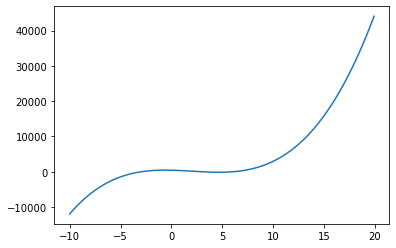

In [91]:
f_z = a * z **3 + b * z**2 + c * z + d + f
print(f_z)
x = np.arange (-10, 20, 0.1)
y = list(map(lambda n: f_z.subs({z:n}), x))
plt.plot(x, y)
plt.show()

In [92]:
solve(f_z)

In [100]:
f_z_p = diff(f_z)
print(f_z_p)

24.576*z**2 - 98.416*z - 73.8


In [120]:
x = [-3.5]
for i in range(1, 5):
    f_ = 1/f_z_p.subs({z:x[i-1]})
    f__ = f_z.subs({z:x[i-1]})
    x.append(x[i-1] - f_ * f__)
for i in range(5):
    print("x", i, " = ", x[i], ", погрешность - ", abs(x[i] + 3), sep="")
 

x0 = -3.5, погрешность - 0.5
x1 = -3.05757794134109, погрешность - 0.0575779413410946
x2 = -3.00119659182177, погрешность - 0.00119659182176690
x3 = -3.00030744633837, погрешность - 0.000307446338373207
x4 = -3.00030722676185, погрешность - 0.000307226761848245


In [277]:
x = [17.491, 17.591]
for i in range(1, 6):
    x.append(x[i-1] - (x[i-1] - x[i-2])*f_z.subs({z:x[i-1]})/((f_z.subs({z:x[i-1]}) - f_z.subs({z:x[i-2]}))))
x

[17.491, 17.591, 18.0512542830145, 18.0512542830145, 18.0118504680345, nan, 18
.014264577857]

In [132]:
x = [5.494, 5.594]
for i in range(2, 8):
    x.append(x[i-1] - (x[i-1] - x[i-2]) * f_z.subs({z:x[i-1]}) / (f_z.subs({z:x[i-1]}) - f_z.subs({z:x[i-2]}))
            )
for i in range(8):
    print("x", i, " = ", x[i], ", погрешность - ", abs(x[i] - 6.009), sep="")


x0 = 5.494, погрешность - 0.5150000000000006
x1 = 5.594, погрешность - 0.41500000000000004
x2 = 6.15204136587788, погрешность - 0.143041365877876
x3 = 5.98009237449863, погрешность - 0.0289076255013736
x4 = 6.00737767278192, погрешность - 0.00162232721808131
x5 = 6.00916733698254, погрешность - 0.000167336982536348
x6 = 6.00914432212839, погрешность - 0.000144322128386776
x7 = 6.00914434014143, погрешность - 0.000144340141429389


In [140]:
x = [3.502]
a = 2.501
for i in range(1, 4):
    x.append(x[i-1] - (x[i-1] - a) * f_z.subs({z:x[i-1]}) / (f_z.subs({z:x[i-1]}) - f_z.subs({z:a})))
for i in range(4):
    print("x", i, " = ", x[i], sep="")

x0 = 3.502
x1 = 3.04015669000324
x2 = 3.00076333413465
x3 = 2.99817636350616
